In [74]:
# 1. Please enter your name
# Farhan Bin Faisal

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [76]:
# 2. Read the csv files
macronutrients = pd.read_csv("/Users/farhan/Desktop/Courses/FARHAN/HHS/USDA_Macronutrients.csv")
micronutrients = pd.read_csv("/Users/farhan/Desktop/Courses/FARHAN/HHS/USDA_Micronutrients.csv")

In [77]:
macronutrients.head(3)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate
0,2047,"SALT,TABLE",0,0.0,0.0,0.00
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04


In [78]:
micronutrients.head(3)

,ID,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,4038,0,0.0,0.00,0.0,0.00,0,0.0,149.40,0.0
1,8504,813,NaN,17.17,45.0,67.67,630,239.7,80.46,NaN
2,25021,386,0.0,16.90,886.0,14.20,412,68.0,64.25,3.1


In [79]:
# 3. Merge the data frames using the variable "ID". Name the Merged Data Frame "USDA".
USDA = pd.merge(macronutrients, micronutrients, on=["ID"])
USDA.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,"38,758",0.0,0.00,24.0,0.33,8,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5,0.0,0.40,7.0,0.20,73,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2,0.0,0.04,6.0,0.03,2,0.0,0.0,0.0
3,2073,"CAMPBELL SOUP CO,PACE,DRY TACO SEAS MIX",188,0.0,0.0,56.29,"8,068",0.0,18.76,NaN,6.75,NaN,45.0,NaN,NaN
4,6597,"CAMPBELL SOUP COMPANY,PACE,CHIPOTLE CHUNKY SALSA",25,0.0,0.0,6.25,719,0.0,6.25,0.0,0.00,NaN,0.0,NaN,NaN


In [80]:
# 4. Prepare the dataset for analysis.

# Look at column DTypes first
print(USDA.dtypes)

ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium           object
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium        object
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object


In [81]:
# Got into a problem, some column values (Na and K) have commas in them
    # Need to replace those commas
columns_need_conversion = ['Sodium', 'Potassium']
USDA[columns_need_conversion] = USDA[columns_need_conversion].apply(lambda x: x.str.replace(',', ''))
USDA[columns_need_conversion] = USDA[columns_need_conversion].apply(pd.to_numeric)

In [82]:
# 5. Remove records with missing values in 4 or more vectors.
USDA = USDA.dropna(thresh=4)
USDA.head(3)


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,38758.0,0.0,0.00,24.0,0.33,8.0,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40,7.0,0.20,73.0,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04,6.0,0.03,2.0,0.0,0.0,0.0


In [83]:
# 6. For records with missing values for Sugar, Vitamin E and Vitamin D, replace missing values with mean value for the respective vector.
mean_sugar = USDA['Sugar'].mean() # Mean in pandas ignores the existing missing values
mean_vitamin_e = USDA['VitaminE'].mean()
mean_vitamin_d = USDA['VitaminD'].mean()

# Can use fillna()
USDA['Sugar'].fillna(mean_sugar, inplace=True)
USDA['VitaminE'].fillna(mean_vitamin_e, inplace=True)
USDA['VitaminD'].fillna(mean_vitamin_d, inplace=True)
USDA.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,38758.0,0.0,0.00,24.0,0.33,8.0,0.0,0.000000,0.000000
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40,7.0,0.20,73.0,0.0,0.000000,0.000000
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04,6.0,0.03,2.0,0.0,0.000000,0.000000
3,2073,"CAMPBELL SOUP CO,PACE,DRY TACO SEAS MIX",188,0.0,0.0,56.29,8068.0,0.0,18.76,NaN,6.75,NaN,45.0,1.487462,0.576918
4,6597,"CAMPBELL SOUP COMPANY,PACE,CHIPOTLE CHUNKY SALSA",25,0.0,0.0,6.25,719.0,0.0,6.25,0.0,0.00,NaN,0.0,1.487462,0.576918


In [84]:
# 7. With a single line of code, remove all remaining records with missing values. Name the new Data Frame "USDAclean"
USDAclean = USDA.dropna()

In [85]:
# 8. Which food has the highest sodium level? 
max_sodium_index = USDAclean['Sodium'].idxmax()
food_with_highest_sodium = USDAclean.loc[max_sodium_index, 'Description']
print("Food with the highest sodium level:", food_with_highest_sodium)

Food with the highest sodium level: SALT,TABLE


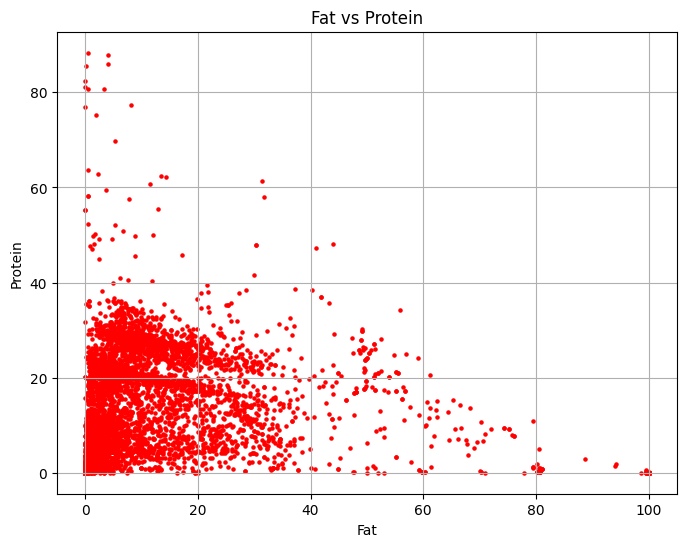

In [86]:
# 9. Create a scatter plot using Protein and Fat, with the plot title “Fat vs Protein”, labeling the axes “Fat” and “Protein”, and making the data points red.

# Just use matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(USDAclean['TotalFat'], USDAclean['Protein'], color='red',  s=5)
plt.title('Fat vs Protein')  # Title of the plot
plt.xlabel('Fat')
plt.ylabel('Protein')
plt.grid(True)  
plt.show()

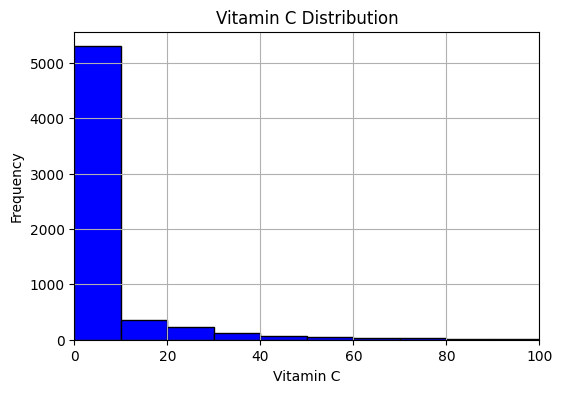

In [87]:
# 10. Create a histogram of Vitamin C distribution in foods, with a limit of 0 to 100 on the x-axis and breaks of 100.
# I am assuming this was a typo and we needed breaks of 10
plt.figure(figsize=(6, 4))
plt.hist(USDAclean['VitaminC'], bins=range(0, 101, 10), color='blue', edgecolor='black') 
plt.title('Vitamin C Distribution')  # Title of the plot
plt.xlabel('Vitamin C')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

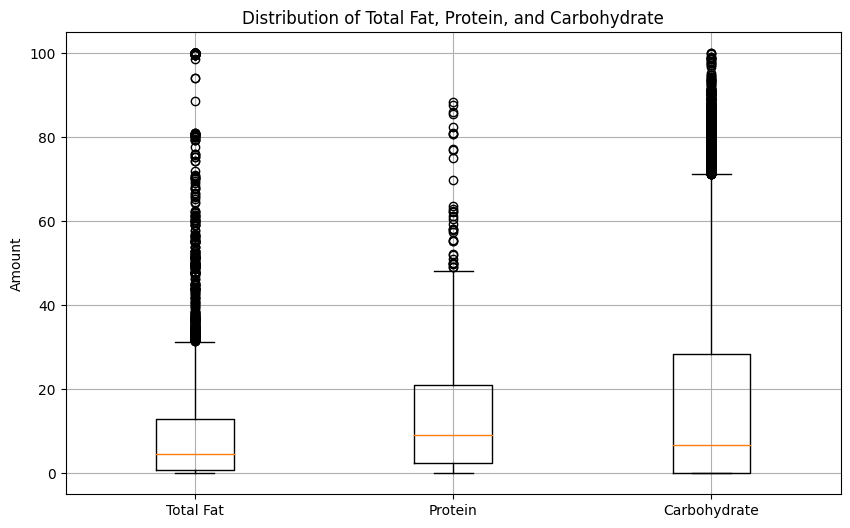

In [88]:
# 11. Create a box and whisker plot to illustrate the distribution of values for Total Fat, Protein and Carbohydrate.
plt.figure(figsize=(10, 6))
plt.boxplot([USDAclean['TotalFat'], USDAclean['Protein'], USDAclean['Carbohydrate']], labels=['Total Fat', 'Protein', 'Carbohydrate'])
plt.title('Distribution of Total Fat, Protein, and Carbohydrate')
plt.ylabel('Amount') 
plt.grid(True)
plt.show()

___
12. Based on this visualization alone, would you recommend removing outliers? Why or why not?
- As we can see all three nutrients have a lot of outliers
- Whether we want to remove them or not depends on our future intentions
    - Some outliers are good as they help us see the variability in the data during exploratory data analysis
    - But if we are to do model training such as regression modelling down the line, it is better to remove the outliers as such heavily skewed features can hamper model performance.
    - If we are doing further analysis using the mean() of these columns, it might also be a good idea to remove outlier.
___


In [89]:
# 13. Add a new variable to the data frame that takes value 1 if the food has higher calories than average, 0 otherwise. Call this variable HighCals. 
average_cals = USDAclean['Calories'].mean()
USDAclean['HighCals'] = (USDAclean['Calories'] > average_cals).astype(int)
print(average_cals)
USDAclean.head()

223.3109350237718


/var/folders/57/9mrlx9kx6xsfb5tsnbtdb9d40000gn/T/ipykernel_4055/4071215879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USDAclean['HighCals'] = (USDAclean['Calories'] > average_cals).astype(int)


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighCals
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,38758.0,0.0,0.00000,24.0,0.33,8.0,0.0,0.000000,0.000000,0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40000,7.0,0.20,73.0,0.0,0.000000,0.000000,0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04000,6.0,0.03,2.0,0.0,0.000000,0.000000,0
14,6971,"SAUCE,WORCESTERSHIRE",78,0.0,0.0,19.46,980.0,0.0,10.03000,107.0,5.30,800.0,13.0,0.080000,0.000000,0
15,14009,"ALCOHOLIC BEV,DAIQUIRI,CND",125,0.0,0.0,15.70,40.0,0.0,8.25654,0.0,0.01,11.0,1.3,1.487462,0.576918,0


In [90]:
# 14. Calculate the average amount of iron by high and low calories (i.e. average amount of iron in foods with high calories and average amount of iron in foods with low calories).  

# Can use groupby here
average_iron_by_cals = USDAclean.groupby('HighCals')['Iron'].mean()
average_iron_by_cals


HighCals
0    1.499884
1    4.788672
Name: Iron, dtype: float64

In [91]:
# 15. Split USDAclean into a training and test set with a 70:30 split ratio.

# Can use scikit learn's train_test_split
train_data, test_data = train_test_split(USDAclean, test_size=0.3, random_state=42)
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (4417, 16)
Test set shape: (1893, 16)


In [92]:
# 16. Create a logistic regression model, using High Calories as the dependent variable, and Carbohydrate, Protein, Total Fat and Sodium as independent variables. 
independent_vars = ['Carbohydrate', 'Protein', 'TotalFat', 'Sodium']
target_var = ['HighCals']

X_train = train_data[independent_vars]
y_train = train_data['HighCals']

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [93]:
# 17. Which independent variable is not significant?

# Look at the feature with the smallest absolute logistic coefficient
# In our case, this seems to be sodium
for feature, coef in zip(X_train.columns, logistic_model.coef_[0]):
    print(feature, "=>", coef)

Carbohydrate => 0.24566692641877566
Protein => 0.23202758816515157
TotalFat => 0.6641835254719707
Sodium => -4.6475287170428636e-05


In [94]:
# 18. Which independent variable has the strongest positive predictive power in the model?
# This seems to be TotalFat

In [95]:
# 19. Refine the model and then test it using the test dataset to predict High Calories.

# Removing sodium still reduces accuracy
independent_vars = ['Carbohydrate', 'Protein', 'TotalFat', 'Sodium']
target_var = ['HighCals']
X_train = train_data[independent_vars]
X_test = test_data[independent_vars]
y_train = train_data['HighCals']
y_test = test_data['HighCals']

# Scale the training data to ensure features are in somewhat similar ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) ## Can scale if needed to help model converge
X_test_scaled = scaler.transform(X_test) 

# Fit the model again
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

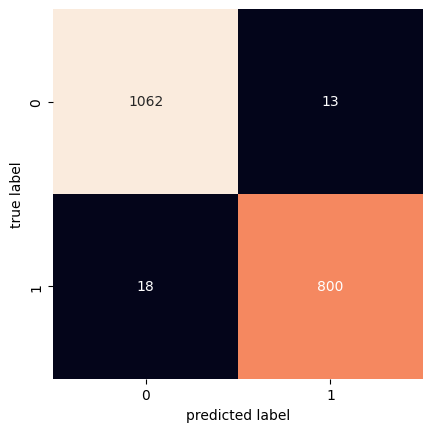

In [96]:
#  20. Produce a confusion matrix (table) for the predictions on the test set and calculate overall accuracy.

# Can display confusion matrix beautifully using a scikit learn module
y_pred = logistic_model.predict(X_test_scaled)
con_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
sns.heatmap(con_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9836238774432118


Thank you for completing this excercise! Save your notebook and send it back to us.